In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore")

from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

In [154]:
loan_df = pd.read_csv("C:\SELLY\KULIAH\SEMESTER 5\Rakamin\Data Scientist IDX\loan_data_2007_2014.csv")
pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 100)
pd.set_option("display.width", 1000)
loan_df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [155]:
#cek informasi data
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [156]:
#cek data duplikat
loan_df.duplicated().sum()

0

In [157]:
loan_df = loan_df.drop('Unnamed: 0', axis = 1)
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [158]:
#cek kolom yang missing value
missing = [i for i in loan_df.columns if loan_df[i].isnull().all()]
print(missing)

['annual_inc_joint', 'dti_joint', 'verification_status_joint', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m']


In [159]:
#menghapus kolom yang missing value
loan_df = loan_df.drop(axis = 1, columns = missing)
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN


In [160]:
#cek informasi data terbaru setelah kolom missing value dihapus
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null  object 
 13 

In [161]:
#mengecek seberapa banyak missing value pada feature yang lain
missing_prcnt = loan_df.isnull().sum()*100/len(loan_df)
data_types = [loan_df[col].dtype for col in loan_df.columns]
missing_df = pd.DataFrame({'missing (%)' : missing_prcnt,
                           'data types' : data_types})
missing_df.sort_values('missing (%)', ascending=False, inplace=True)
print("Jumlah Missing Value (%) Pada Data")
print(missing_df[missing_df['missing (%)'] != 0])

Jumlah Missing Value (%) Pada Data
                             missing (%) data types
mths_since_last_record         86.566585    float64
mths_since_last_major_derog    78.773926    float64
desc                           72.981546     object
mths_since_last_delinq         53.690554    float64
next_pymnt_d                   48.728567     object
tot_cur_bal                    15.071469    float64
tot_coll_amt                   15.071469    float64
total_rev_hi_lim               15.071469    float64
emp_title                       5.916553     object
emp_length                      4.505399     object
last_pymnt_d                    0.080637     object
revol_util                      0.072917    float64
collections_12_mths_ex_med      0.031097    float64
last_credit_pull_d              0.009007     object
inq_last_6mths                  0.006219    float64
open_acc                        0.006219    float64
earliest_cr_line                0.006219     object
delinq_2yrs                  

In [162]:
#handle missing value
#hapus 5 variabel dengan missing value tertinggi
loan_df = loan_df.drop(axis = 1, columns = ["mths_since_last_record",
                                            "mths_since_last_major_derog",
                                            "desc", "mths_since_last_delinq",
                                            "next_pymnt_d"])
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,Jan-16,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,Jan-16,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,Jan-15,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Jan-16,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN


In [163]:
#imputasi missing value
  
#dengan median (data numerik)
for i in loan_df.select_dtypes(exclude="object"):
    loan_df.loc[loan_df.loc[:,i].isnull(),i] = loan_df.loc[:,i].median()
    
#dengan modus (data kategorik)
for i in loan_df.select_dtypes(include="object"):
    loan_df[i] = loan_df[i].fillna(loan_df[i].mode().iloc[0])

#cek missing value lagi
loan_df.isnull().sum()

id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_title                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
pymnt_plan                    0
url                           0
purpose                       0
title                         0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_ac

In [164]:
#cek unique values data numerik
print("Unique Values Untuk Data Numerik")
print(loan_df.select_dtypes(exclude="object").nunique())

Unique Values Untuk Data Numerik
id                            466285
member_id                     466285
loan_amnt                       1352
funded_amnt                     1354
funded_amnt_inv                 9854
int_rate                         506
installment                    55622
annual_inc                     31901
dti                             3997
delinq_2yrs                       24
inq_last_6mths                    28
open_acc                          62
pub_rec                           26
revol_bal                      58142
revol_util                      1269
total_acc                        112
out_prncp                     135665
out_prncp_inv                 141189
total_pymnt                   351609
total_pymnt_inv               347659
total_rec_prncp               172713
total_rec_int                 270249
total_rec_late_fee              5808
recoveries                     22773
collection_recovery_fee        20275
last_pymnt_amnt               198194
colle

In [165]:
#cek unique values data kategorik
print("Unique Values Untuk Data Kategorik")
print(loan_df.select_dtypes(include="object").nunique())

Unique Values Untuk Data Kategorik
term                        2
grade                       7
sub_grade                  35
emp_title              205475
emp_length                 11
home_ownership              6
verification_status         3
issue_d                    91
loan_status                 9
pymnt_plan                  2
url                    466285
purpose                    14
title                   63099
zip_code                  888
addr_state                 50
earliest_cr_line          664
initial_list_status         2
last_pymnt_d               98
last_credit_pull_d        103
application_type            1
dtype: int64


Jumlah Kategori Pada Loan Status
Does not meet the credit policy. Status:Charged Off       761
Default                                                   832
Late (16-30 days)                                        1218
Does not meet the credit policy. Status:Fully Paid       1988
In Grace Period                                          3146
Late (31-120 days)                                       6900
Charged Off                                             42475
Fully Paid                                             184739
Current                                                224226
Name: loan_status, dtype: int64

Jumlah Kategori Pada Loan Status (%)
Does not meet the credit policy. Status:Charged Off    0.001632
Default                                                0.001784
Late (16-30 days)                                      0.002612
Does not meet the credit policy. Status:Fully Paid     0.004263
In Grace Period                                        0.006747
Late (31-120 days) 

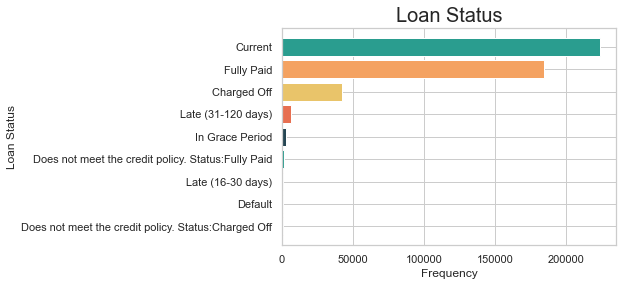

In [166]:
#feature target = loan_status
data1 = loan_df['loan_status'].value_counts().sort_values()
fig, ax = plt.subplots()
loan_status = data1.index
frequency = data1.values
bar_color = ("#e76f51","#e9c46a","#f4a261","#2a9d8f","#264653")
ax.barh(loan_status, frequency, color=bar_color)
ax.set_title('Loan Status', fontsize=20)
ax.set_ylabel('Loan Status')
ax.set_xlabel('Frequency')
print("Jumlah Kategori Pada Loan Status")
print(data1)
print("\nJumlah Kategori Pada Loan Status (%)")
print(loan_df['loan_status'].value_counts(normalize=True, dropna=False).sort_values())
plt.show()

In [167]:
#mengklasifikasikan loan_status menjadi 2 kelompok, yaitu Good and Bad
status_new = {"Does not meet the credit policy. Status:Charged Off" : 0,
              "Charged Off" : 0,
              "Default" : 0,
              "Late (31-120 days)" : 0,
              "Does not meet the credit policy. Status:Fully Paid" : 1,
              "Fully Paid" : 1,
              "Late (16-30 days)" : 2,
              "In Grace Period" : 2,
              "Current" : 2}
#0 = Bad ; 1 = Good ; 2 = Proccess (Belum bisa dikatakan good or bad)
loan_df["loan_status"] = loan_df["loan_status"].map(status_new)
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,Teacher,10+ years,RENT,24000.0,Verified,Dec-11,1,n,https://www.lendingclub.com/browse/loanDetail....,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,Jan-16,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,0,n,https://www.lendingclub.com/browse/loanDetail....,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,Teacher,10+ years,RENT,12252.0,Not Verified,Dec-11,1,n,https://www.lendingclub.com/browse/loanDetail....,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,Jan-16,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,1,n,https://www.lendingclub.com/browse/loanDetail....,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,Jan-15,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,2,n,https://www.lendingclub.com/browse/loanDetail....,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Jan-16,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0


In [168]:
#hapus baris yang loan_statusnya = 2
loan_df = loan_df[loan_df.loan_status != 2]
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,Teacher,10+ years,RENT,24000.0,Verified,Dec-11,1,n,https://www.lendingclub.com/browse/loanDetail....,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,Jan-16,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,0,n,https://www.lendingclub.com/browse/loanDetail....,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,Teacher,10+ years,RENT,12252.0,Not Verified,Dec-11,1,n,https://www.lendingclub.com/browse/loanDetail....,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,Jan-16,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,1,n,https://www.lendingclub.com/browse/loanDetail....,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,Jan-15,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-11,1,n,https://www.lendingclub.com/browse/loanDetail....,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0.0,Nov-04,3.0,9.0,0.0,7963,28.3,12.0,f,0.0,0.0,5631.377753,5631.38,5000.00,631.38,0.00,0.00,0.00,Jan-15,161.03,Sep-15,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0


Keterangan
0 = Bad Loan
1 = Good Loan

Loan Status (%)
0    0.214426
1    0.785574
Name: loan_status, dtype: float64


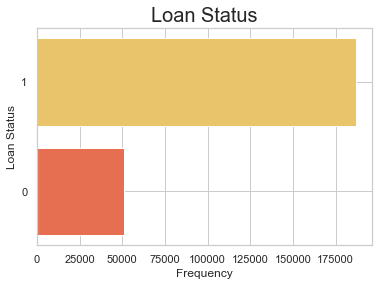

In [169]:
#EDA loan_status terbaru
fig, ax = plt.subplots()
data1 = loan_df['loan_status'].value_counts().sort_values()
loan_status = data1.index
frequency = data1.values
bar_color = ("#e76f51","#e9c46a","#f4a261","#2a9d8f","#264653")
ax.barh(loan_status, frequency, color=bar_color)
ax.set_title('Loan Status', fontsize=20)
ax.set_ylabel('Loan Status')
ax.set_xlabel('Frequency')
plt.yticks(range(0,2,1)) 

print("Keterangan")
print("0 = Bad Loan")
print("1 = Good Loan\n")
print("Loan Status (%)")
print(loan_df['loan_status'].value_counts(normalize=True, dropna=False).sort_values())

plt.show()

In [170]:
loan_df["earliest_cr_line"].value_counts()

Oct-00    2056
Oct-99    1883
Nov-00    1847
Oct-01    1840
Nov-99    1807
          ... 
Sep-56       1
Dec-61       1
Apr-55       1
Apr-63       1
Jul-61       1
Name: earliest_cr_line, Length: 634, dtype: int64

In [171]:
loan_df["last_credit_pull_d"].value_counts()

Jan-16    100503
Dec-15     13771
Nov-15      8233
Sep-15      7982
Oct-15      7846
Jul-15      7282
Aug-15      6521
Jun-15      6159
Apr-15      5661
Mar-15      5444
May-15      5309
Feb-15      4790
Jan-15      4753
Dec-14      3681
Oct-14      3346
Nov-14      3158
Sep-14      2957
Aug-14      2807
Jul-14      2768
May-14      2289
Jun-14      2228
Mar-14      2201
Apr-14      2188
Feb-14      1927
Jan-14      1791
Feb-13      1446
Nov-13      1407
Dec-13      1390
Oct-13      1271
Sep-13      1062
Aug-13      1048
Mar-13      1037
Jul-13      1020
May-13       997
Jun-13       851
Apr-13       836
Nov-12       576
Dec-12       576
Sep-12       525
Oct-12       515
Aug-12       505
Feb-12       420
Mar-12       402
May-12       388
Jul-12       384
Jun-12       376
Apr-12       360
Mar-11       335
Aug-11       305
Jan-12       286
Dec-11       278
May-11       227
Nov-11       227
Feb-11       210
Jun-11       204
Jul-11       186
Apr-11       185
Sep-11       184
Jan-11       1

In [172]:
loan_df["last_pymnt_d"].value_counts()

Jul-15    11703
Oct-15    11248
Sep-15    10204
Mar-15    10087
Jun-15    10078
Apr-15    10051
Aug-15     9939
May-15     9618
Nov-15     9280
Dec-15     9010
Jan-15     8611
Feb-15     8488
Oct-14     7676
Dec-14     7253
Sep-14     6316
Jul-14     6312
Aug-14     6305
Nov-14     6206
Jun-14     5620
May-14     4721
Mar-14     4572
Jan-16     4433
Apr-14     4327
Jan-14     3655
Feb-14     3632
Dec-13     3050
Oct-13     2832
Nov-13     2662
Aug-13     2515
Sep-13     2510
Jul-13     2395
May-13     2170
Mar-13     2070
Jun-13     1987
Apr-13     1910
Feb-13     1614
Jan-13     1479
Oct-12     1268
Dec-12     1198
Nov-12     1198
Aug-12     1134
Sep-12     1125
Jul-12      962
Mar-12      951
May-12      878
Jun-12      861
Apr-12      860
Feb-12      803
Mar-11      596
Dec-11      585
Jan-12      575
Apr-11      519
Sep-11      491
Nov-11      487
Oct-11      482
Aug-11      479
Jul-11      454
May-11      448
Jun-11      440
Feb-11      437
Dec-10      332
Jan-11      330
Oct-10  

In [173]:
loan_df["issue_d"].value_counts()

Oct-14    9704
Jul-14    9226
Apr-14    7121
Nov-13    6904
Dec-13    6893
Oct-13    6876
May-14    6825
Jan-14    6818
Aug-13    6569
Sep-13    6542
Mar-14    6507
Jul-13    6325
Jun-13    6153
Feb-14    6148
May-13    6023
Nov-12    5915
Oct-12    5868
Jun-14    5747
Sep-12    5705
Apr-13    5676
Aug-14    5613
Jan-13    5532
Dec-12    5481
Nov-14    5472
Aug-12    5084
Mar-13    5041
Feb-13    4660
Jul-12    4350
Jun-12    3580
May-12    3178
Apr-12    3053
Sep-14    2948
Mar-12    2747
Jan-12    2441
Feb-12    2411
Nov-11    2031
Dec-14    2025
Dec-11    1990
Oct-11    1914
Sep-11    1886
Aug-11    1771
Jul-11    1721
Jun-11    1705
May-11    1486
Apr-11    1415
Dec-10    1326
Jan-11    1313
Mar-11    1303
Oct-10    1232
Nov-10    1224
Jul-10    1204
Feb-11    1194
Sep-10    1189
Aug-10    1175
Jun-10    1105
May-10     989
Apr-10     912
Mar-10     828
Feb-10     682
Nov-09     662
Jan-10     662
Dec-09     658
Oct-09     604
Sep-09     507
Aug-09     446
Jul-09     411
Jun-09    

In [174]:
def date_time(dt):
  if dt.year > 2016:
    dt = dt.replace(year=dt.year-100)
  return dt

In [175]:
loan_df["earliest_cr_line"] = pd.to_datetime(loan_df["earliest_cr_line"], format="%b-%y")
loan_df["earliest_cr_line"] = loan_df["earliest_cr_line"].apply(lambda x: date_time(x))
loan_df["issue_d"] = pd.to_datetime(loan_df["issue_d"], format="%b-%y")
loan_df["last_pymnt_d"] = pd.to_datetime(loan_df["last_pymnt_d"], format="%b-%y")
loan_df["last_credit_pull_d"] = pd.to_datetime(loan_df["last_credit_pull_d"], format="%b-%y")
loan_df[["earliest_cr_line",
        "issue_d",
        "last_pymnt_d",
        "last_credit_pull_d"]].head()

,earliest_cr_line,issue_d,last_pymnt_d,last_credit_pull_d
0,1985-01-01,2011-12-01,2015-01-01,2016-01-01
1,1999-04-01,2011-12-01,2013-04-01,2013-09-01
2,2001-11-01,2011-12-01,2014-06-01,2016-01-01
3,1996-02-01,2011-12-01,2015-01-01,2015-01-01
5,2004-11-01,2011-12-01,2015-01-01,2015-09-01


In [176]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 237695 entries, 0 to 466283
Data columns (total 52 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   id                          237695 non-null  int64         
 1   member_id                   237695 non-null  int64         
 2   loan_amnt                   237695 non-null  int64         
 3   funded_amnt                 237695 non-null  int64         
 4   funded_amnt_inv             237695 non-null  float64       
 5   term                        237695 non-null  object        
 6   int_rate                    237695 non-null  float64       
 7   installment                 237695 non-null  float64       
 8   grade                       237695 non-null  object        
 9   sub_grade                   237695 non-null  object        
 10  emp_title                   237695 non-null  object        
 11  emp_length                  237695 non-

In [177]:
def diff_month(a, b):
    return (a.year-b.year)*12+a.month-b.month

In [178]:
def diff_year(a, b):
    return (a.year-b.year)

In [179]:
((loan_df.apply(lambda x: diff_month(x.last_pymnt_d, x.issue_d), axis=1) < 0)).any().any()

False

In [180]:
((loan_df.apply(lambda x: diff_month(x.last_credit_pull_d, x.earliest_cr_line), axis=1) < 0)).any().any()

False

In [181]:
#pymnt_time = (issue_d) - (last_pymnt_d)
loan_df["pymnt_time"] = loan_df.apply(lambda x: diff_month(x.last_pymnt_d, x.issue_d), axis=1)
#credit_pull_year = (earliest_cr_line) - (last_credit_pull_d)
loan_df["credit_pull_year"] = loan_df.apply(lambda x: diff_year(x.last_credit_pull_d, x.earliest_cr_line), axis=1)

loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 237695 entries, 0 to 466283
Data columns (total 54 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   id                          237695 non-null  int64         
 1   member_id                   237695 non-null  int64         
 2   loan_amnt                   237695 non-null  int64         
 3   funded_amnt                 237695 non-null  int64         
 4   funded_amnt_inv             237695 non-null  float64       
 5   term                        237695 non-null  object        
 6   int_rate                    237695 non-null  float64       
 7   installment                 237695 non-null  float64       
 8   grade                       237695 non-null  object        
 9   sub_grade                   237695 non-null  object        
 10  emp_title                   237695 non-null  object        
 11  emp_length                  237695 non-

In [182]:
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,pymnt_time,credit_pull_year
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,Teacher,10+ years,RENT,24000.0,Verified,2011-12-01,1,n,https://www.lendingclub.com/browse/loanDetail....,credit_card,Computer,860xx,AZ,27.65,0.0,1985-01-01,1.0,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,2015-01-01,171.62,2016-01-01,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0,37,31
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,2011-12-01,0,n,https://www.lendingclub.com/browse/loanDetail....,car,bike,309xx,GA,1.00,0.0,1999-04-01,5.0,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,2013-09-01,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0,16,14
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,Teacher,10+ years,RENT,12252.0,Not Verified,2011-12-01,1,n,https://www.lendingclub.com/browse/loanDetail....,small_business,real estate business,606xx,IL,8.72,0.0,2001-11-01,2.0,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,2014-06-01,649.91,2016-01-01,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0,30,15
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,2011-12-01,1,n,https://www.lendingclub.com/browse/loanDetail....,other,personel,917xx,CA,20.00,0.0,1996-02-01,1.0,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,2015-01-01,357.48,2015-01-01,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0,37,19
5,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,2011-12-01,1,n,https://www.lendingclub.com/browse/loanDetail....,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0.0,2004-11-01,3.0,9.0,0.0,7963,28.3,12.0,f,0.0,0.0,5631.377753,5631.38,5000.00,631.38,0.00,0.00,0.00,2015-01-01,161.03,2015-09-01,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0,37,11


In [183]:
#menghapus data yang tidak terlalu dibutuhkan
data_remove = ['member_id','policy_code','emp_title','url','title','zip_code','earliest_cr_line',
               'last_credit_pull_d','last_pymnt_d','issue_d','addr_state','application_type','out_prncp_inv',
               'funded_amnt','total_pymnt_inv','funded_amnt_inv','total_rec_prncp','out_prncp','revol_bal',
               'total_pymnt','recoveries','total_rec_int','total_acc','loan_amnt']

In [184]:
len(data_remove)

24

In [185]:
#dataframe baru
df_clean = loan_df[loan_df.columns[~loan_df.columns.isin(data_remove)]].reset_index(drop=True)
df_clean.head()

,id,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_util,initial_list_status,total_rec_late_fee,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,pymnt_time,credit_pull_year
0,1077501,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,1,n,credit_card,27.65,0.0,1.0,3.0,0.0,83.7,f,0.00,0.00,171.62,0.0,0.0,0.0,81539.0,22800.0,37,31
1,1077430,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,0,n,car,1.00,0.0,5.0,3.0,0.0,9.4,f,0.00,1.11,119.66,0.0,0.0,0.0,81539.0,22800.0,16,14
2,1077175,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,1,n,small_business,8.72,0.0,2.0,2.0,0.0,98.5,f,0.00,0.00,649.91,0.0,0.0,0.0,81539.0,22800.0,30,15
3,1076863,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,1,n,other,20.00,0.0,1.0,10.0,0.0,21.0,f,16.97,0.00,357.48,0.0,0.0,0.0,81539.0,22800.0,37,19
4,1075269,36 months,7.90,156.46,A,A4,3 years,RENT,36000.0,Source Verified,1,n,wedding,11.20,0.0,3.0,9.0,0.0,28.3,f,0.00,0.00,161.03,0.0,0.0,0.0,81539.0,22800.0,37,11


In [186]:
df_clean.shape

(237695, 30)

In [187]:
#Statistics Descriptive
df_clean.describe()

,id,int_rate,installment,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_util,total_rec_late_fee,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,pymnt_time,credit_pull_year
count,2.376950e+05,237695.000000,237695.000000,2.376950e+05,237695.000000,237695.000000,237695.000000,237695.000000,237695.000000,237695.000000,237695.000000,237695.000000,237695.000000,237695.000000,237695.000000,237695.000000,2.376950e+05,2.376950e+05,2.376950e+05,237695.000000,237695.000000
mean,8.538434e+06,13.844646,416.623498,7.192614e+04,0.785574,16.428473,0.247266,0.906759,10.853943,0.134551,54.972813,0.922284,17.579793,5686.209093,0.005856,0.002886,1.445875e+02,1.211644e+05,2.734911e+04,18.656960,17.543516
std,9.261314e+06,4.378830,243.631791,5.516305e+04,0.410424,7.694727,0.733731,1.173825,4.824864,0.420928,24.668079,6.269179,119.105531,6854.640584,0.082857,0.058449,1.882389e+04,1.298310e+05,2.440079e+04,11.283279,7.047302
min,5.473400e+04,5.420000,15.670000,1.896000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,1.000000
25%,1.375144e+06,10.990000,239.180000,4.500000e+04,1.000000,10.710000,0.000000,0.000000,7.000000,0.000000,37.200000,0.000000,0.000000,419.580000,0.000000,0.000000,0.000000e+00,3.974250e+04,1.640000e+04,10.000000,13.000000
50%,5.425530e+06,13.670000,365.010000,6.142500e+04,1.000000,16.130000,0.000000,1.000000,10.000000,0.000000,56.700000,0.000000,0.000000,2973.230000,0.000000,0.000000,0.000000e+00,8.153900e+04,2.280000e+04,16.000000,16.000000
75%,1.245681e+07,16.590000,545.330000,8.600000e+04,1.000000,21.870000,0.000000,1.000000,13.000000,0.000000,74.400000,0.000000,0.000000,8852.010000,0.000000,0.000000,0.000000e+00,1.568880e+05,2.940000e+04,27.000000,21.000000
max,3.785416e+07,26.060000,1408.130000,7.141778e+06,1.000000,39.990000,29.000000,33.000000,76.000000,11.000000,892.300000,358.680000,7002.190000,36234.440000,6.000000,5.000000,9.152545e+06,8.000078e+06,2.013133e+06,95.000000,68.000000


In [188]:
df_clean.describe(include="object")

,term,grade,sub_grade,emp_length,home_ownership,verification_status,pymnt_plan,purpose,initial_list_status
count,237695,237695,237695,237695,237695,237695,237695,237695,237695
unique,2,7,35,11,6,3,2,14,2
top,36 months,B,B3,10+ years,MORTGAGE,Verified,n,debt_consolidation,f
freq,185700,71990,17316,80095,116769,88337,237689,138318,177046


In [189]:
df_clean.dtypes.value_counts()

float64    17
object      9
int64       4
dtype: int64

In [190]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237695 entries, 0 to 237694
Data columns (total 30 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id                          237695 non-null  int64  
 1   term                        237695 non-null  object 
 2   int_rate                    237695 non-null  float64
 3   installment                 237695 non-null  float64
 4   grade                       237695 non-null  object 
 5   sub_grade                   237695 non-null  object 
 6   emp_length                  237695 non-null  object 
 7   home_ownership              237695 non-null  object 
 8   annual_inc                  237695 non-null  float64
 9   verification_status         237695 non-null  object 
 10  loan_status                 237695 non-null  int64  
 11  pymnt_plan                  237695 non-null  object 
 12  purpose                     237695 non-null  object 
 13  dti           

In [191]:
num = df_clean.select_dtypes(include=[np.float64,np.int64])
num = num[num.columns[~num.columns.isin(['id','loan_status'])]]
num

,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_util,total_rec_late_fee,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,pymnt_time,credit_pull_year
0,10.65,162.87,24000.0,27.65,0.0,1.0,3.0,0.0,83.7,0.00,0.000,171.62,0.0,0.0,0.0,81539.0,22800.0,37,31
1,15.27,59.83,30000.0,1.00,0.0,5.0,3.0,0.0,9.4,0.00,1.110,119.66,0.0,0.0,0.0,81539.0,22800.0,16,14
2,15.96,84.33,12252.0,8.72,0.0,2.0,2.0,0.0,98.5,0.00,0.000,649.91,0.0,0.0,0.0,81539.0,22800.0,30,15
3,13.49,339.31,49200.0,20.00,0.0,1.0,10.0,0.0,21.0,16.97,0.000,357.48,0.0,0.0,0.0,81539.0,22800.0,37,19
4,7.90,156.46,36000.0,11.20,0.0,3.0,9.0,0.0,28.3,0.00,0.000,161.03,0.0,0.0,0.0,81539.0,22800.0,37,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237690,18.25,217.65,37536.0,12.28,4.0,0.0,12.0,0.0,10.7,0.00,11.594,217.65,0.0,0.0,0.0,116995.0,49800.0,4,20
237691,7.90,563.23,90000.0,10.33,1.0,0.0,16.0,0.0,16.3,0.00,0.000,563.23,0.0,0.0,0.0,42592.0,50300.0,10,16
237692,18.25,362.78,42000.0,11.57,0.0,0.0,9.0,0.0,28.8,0.00,0.000,5501.60,0.0,0.0,0.0,10170.0,11100.0,20,14
237693,19.97,582.50,78000.0,18.45,0.0,5.0,18.0,1.0,46.3,0.00,0.000,17.50,0.0,0.0,0.0,221830.0,39400.0,11,19


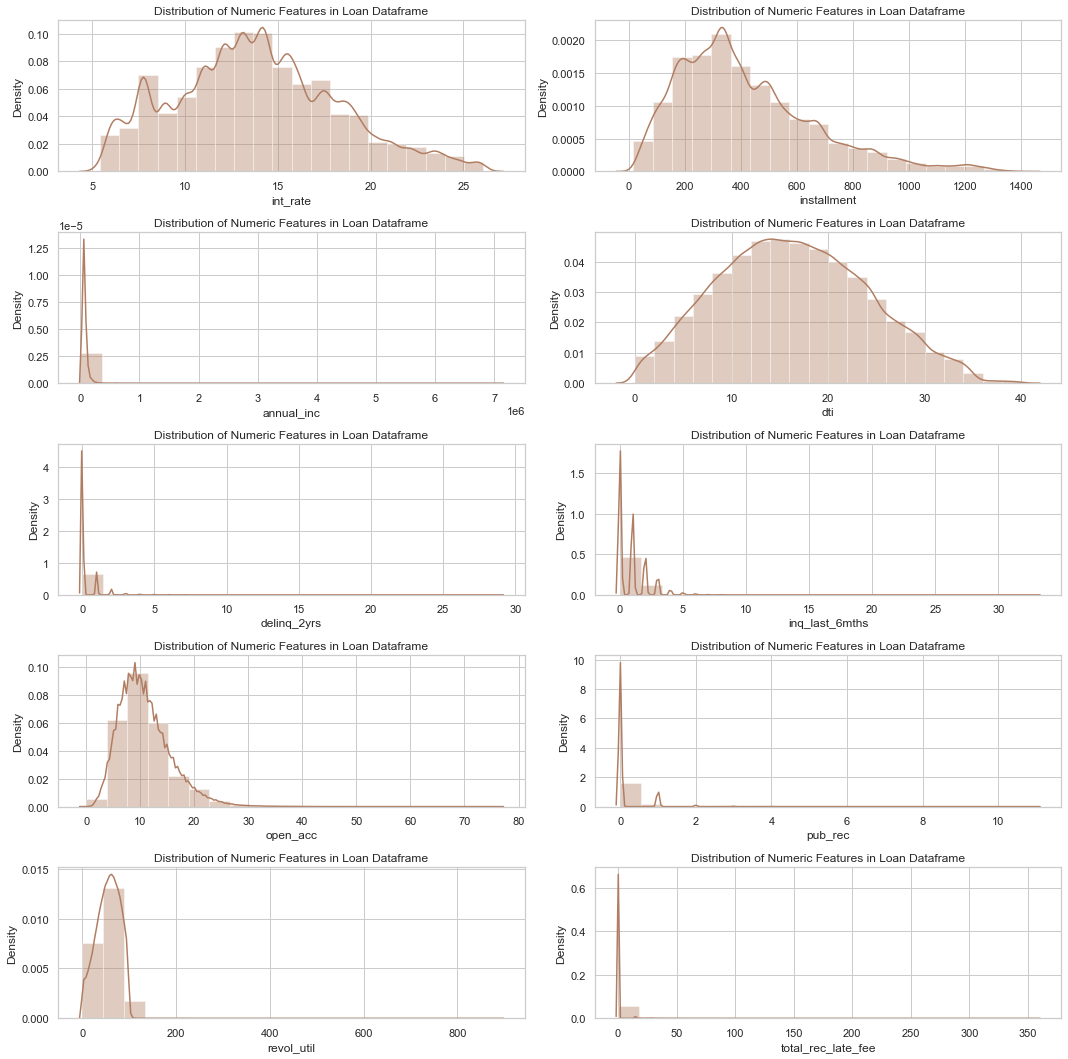

In [192]:
plt.figure(figsize=(15,35))
for i in range (0,10):
    plt.subplot(12,2,i+1)
    sns.distplot(num.iloc[:,i], bins=20, color = "#b07d62").set(title='Distribution of Numeric Features in Loan Dataframe')
    plt.tight_layout()

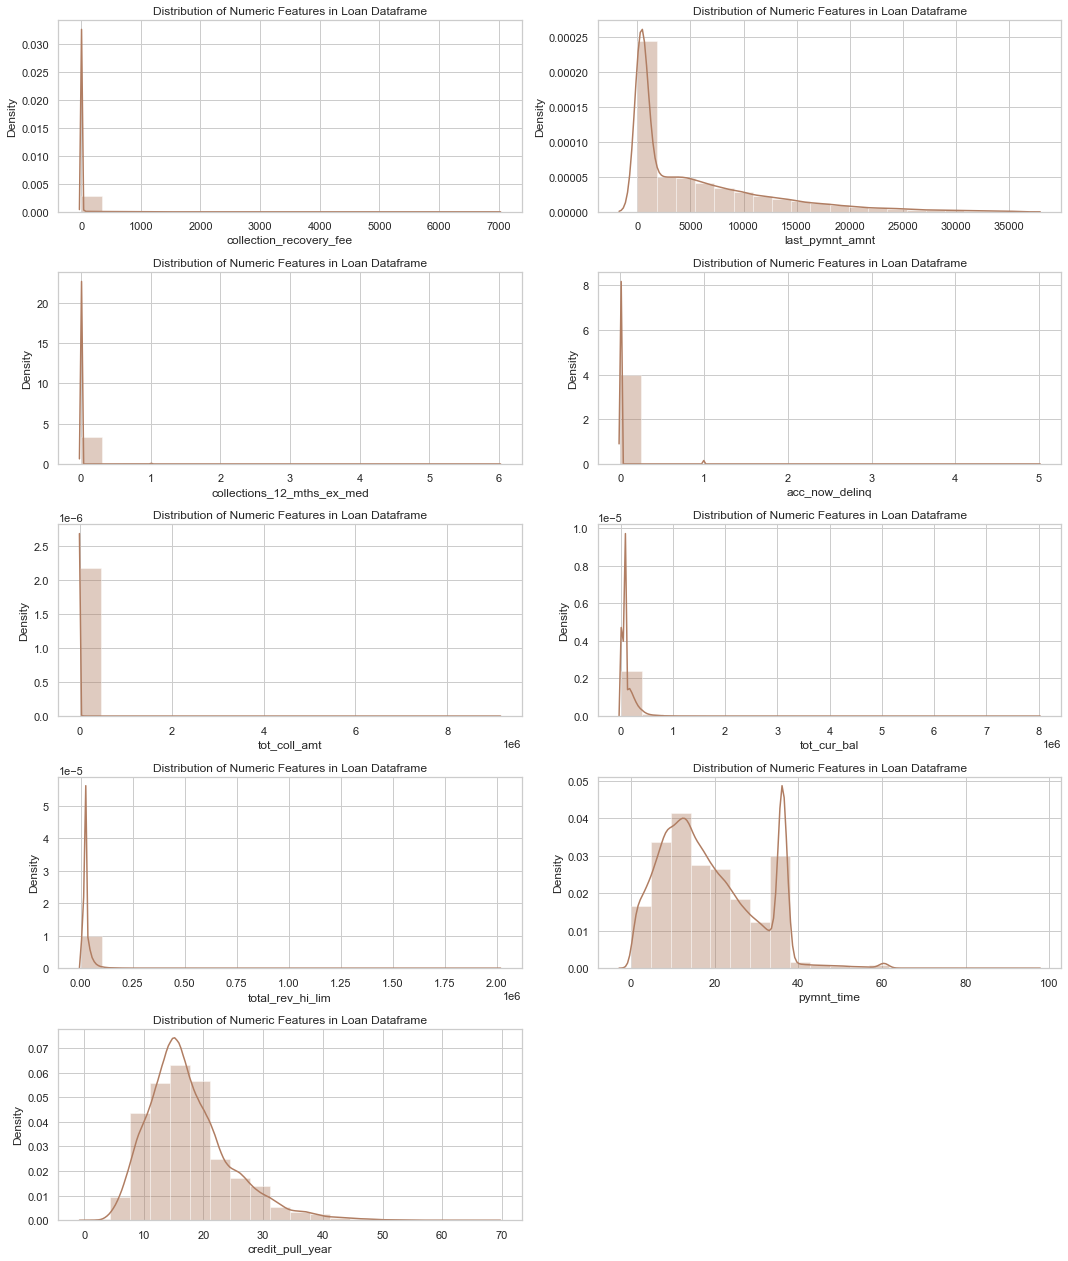

In [193]:
plt.figure(figsize=(15,35))
for i in range (10,19):
    plt.subplot(10,2,i+1)
    sns.distplot(num.iloc[:,i], bins=20, color = "#b07d62").set(title='Distribution of Numeric Features in Loan Dataframe')
    plt.tight_layout()

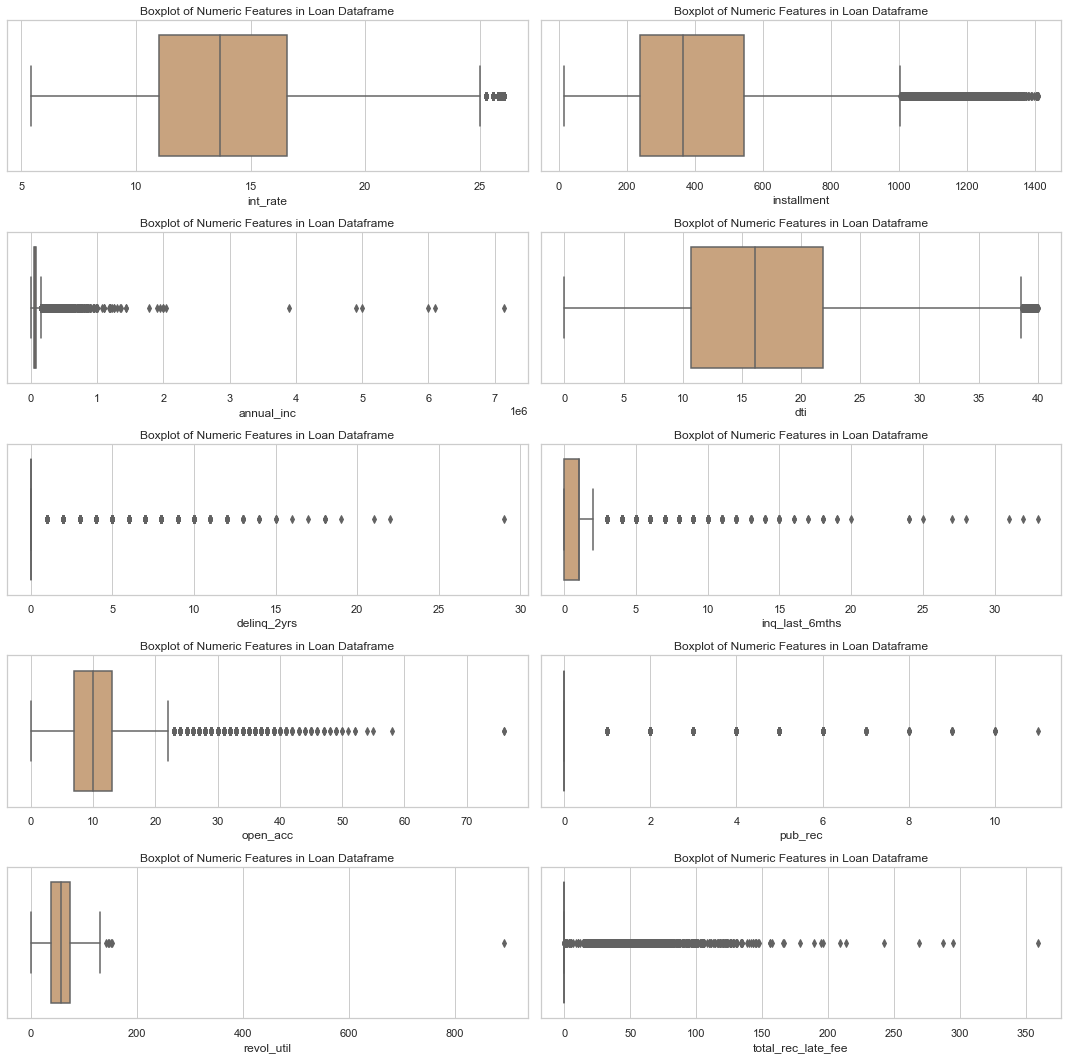

In [194]:
plt.figure(figsize=(15,35))
for i in range (0,10):
    plt.subplot(12,2,i+1)
    sns.boxplot(num.iloc[:,i], color = "#d4a373").set(title='Boxplot of Numeric Features in Loan Dataframe')
    plt.tight_layout()

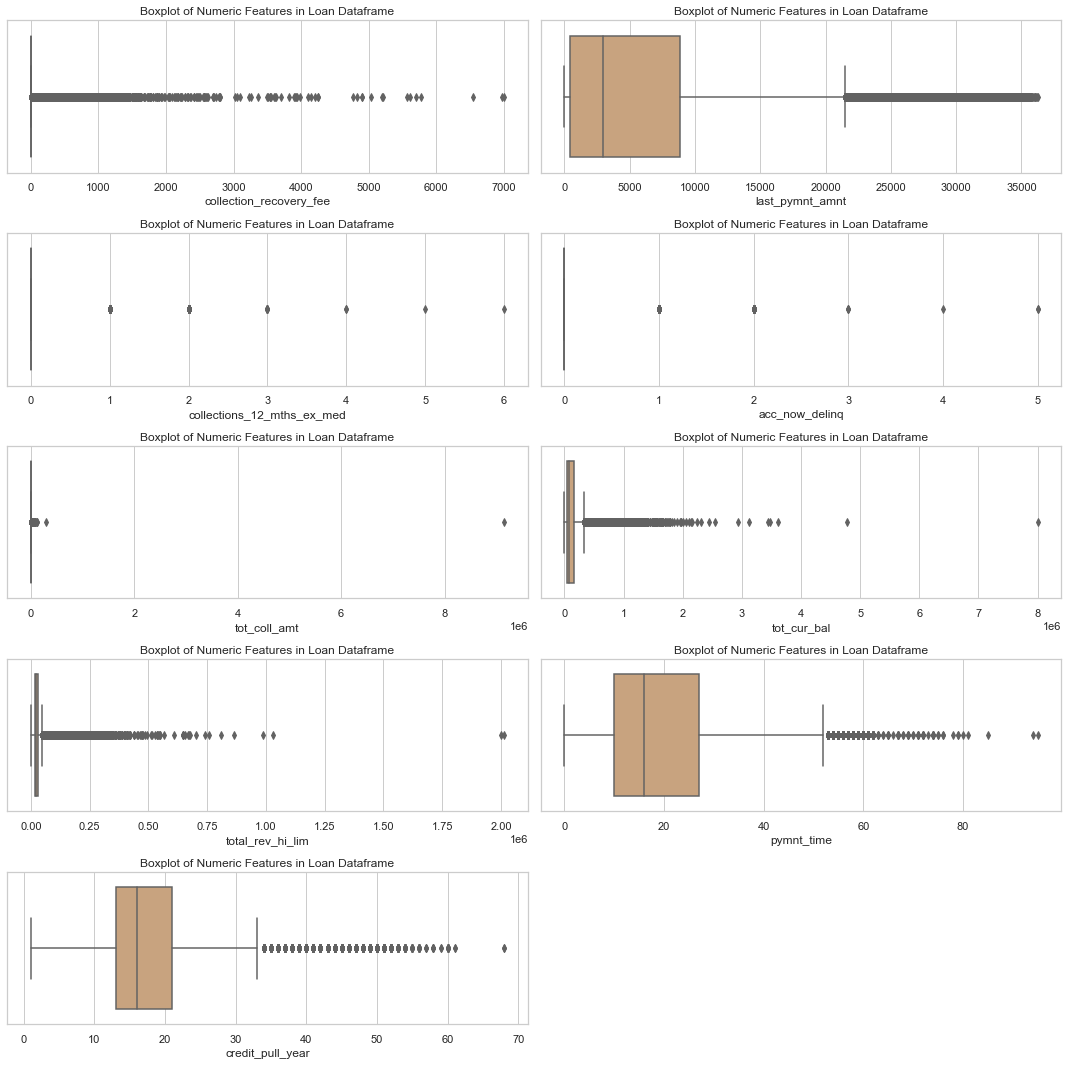

In [195]:
plt.figure(figsize=(15,35))
for i in range (10,19):
    plt.subplot(12,2,i+1)
    sns.boxplot(num.iloc[:,i], color = "#d4a373").set(title='Boxplot of Numeric Features in Loan Dataframe')
    plt.tight_layout()

In [196]:
#korelasi keseluruhan
correlation = num.corr()
num.corr()

,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_util,total_rec_late_fee,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,pymnt_time,credit_pull_year
int_rate,1.000000,0.202501,-0.019303,0.172906,0.101949,0.199802,0.046682,0.087265,0.356257,0.062765,0.114659,0.113508,0.029994,0.032332,0.001689,-0.050895,-0.124200,-0.160745,-0.082493
installment,0.202501,1.000000,0.348001,0.061459,0.024437,0.008777,0.201143,-0.062668,0.134299,0.064075,0.115378,0.489836,0.001778,0.015725,-0.000732,0.270838,0.293812,-0.074116,0.149778
annual_inc,-0.019303,0.348001,1.000000,-0.176755,0.055660,0.057710,0.152340,-0.019613,0.025518,0.019469,0.022808,0.230262,0.004862,0.017116,0.002306,0.396991,0.277466,-0.028726,0.165906
dti,0.172906,0.061459,-0.176755,1.000000,0.000193,-0.004193,0.312682,-0.033112,0.226776,0.000937,0.041139,0.007803,0.004152,0.010219,-0.002593,0.017340,0.072838,-0.067633,0.041794
delinq_2yrs,0.101949,0.024437,0.055660,0.000193,1.000000,0.022813,0.060668,-0.004891,-0.014672,0.031479,0.015729,0.014926,0.041161,0.109909,-0.000183,0.076431,-0.025852,-0.051099,0.088731
inq_last_6mths,0.199802,0.008777,0.057710,-0.004193,0.022813,1.000000,0.099190,0.039815,-0.090255,0.029337,0.029946,-0.005682,-0.000571,-0.004172,0.000660,0.048145,0.014858,-0.033965,0.002544
open_acc,0.046682,0.201143,0.152340,0.312682,0.060668,0.099190,1.000000,-0.013448,-0.102451,-0.004001,0.027757,0.135774,0.017862,0.019665,-0.000274,0.228594,0.320593,-0.083553,0.157945
pub_rec,0.087265,-0.062668,-0.019613,-0.033112,-0.004891,0.039815,-0.013448,1.000000,-0.054023,-0.011863,-0.002873,-0.001158,0.022884,0.005078,0.002151,-0.046323,-0.103810,-0.107141,0.072997
revol_util,0.356257,0.134299,0.025518,0.226776,-0.014672,-0.090255,-0.102451,-0.054023,1.000000,0.030342,0.035846,0.017195,-0.022428,-0.018039,-0.003735,0.063573,-0.119093,0.023221,0.002512
total_rec_late_fee,0.062765,0.064075,0.019469,0.000937,0.031479,0.029337,-0.004001,-0.011863,0.030342,1.000000,0.075216,-0.081630,0.002749,0.002803,-0.000536,-0.000287,-0.004929,0.054709,-0.001807


In [197]:
sorted_cor = correlation.unstack().sort_values(ascending=False)

#korelasi kuat (di atas 0.5)
high_cor = sorted_cor[sorted_cor != 1]
high_cor = high_cor[abs(high_cor) > 0.5]
print(high_cor)

Series([], dtype: float64)


<AxesSubplot:title={'center':'Matriks Korelasi Pearson\n'}>

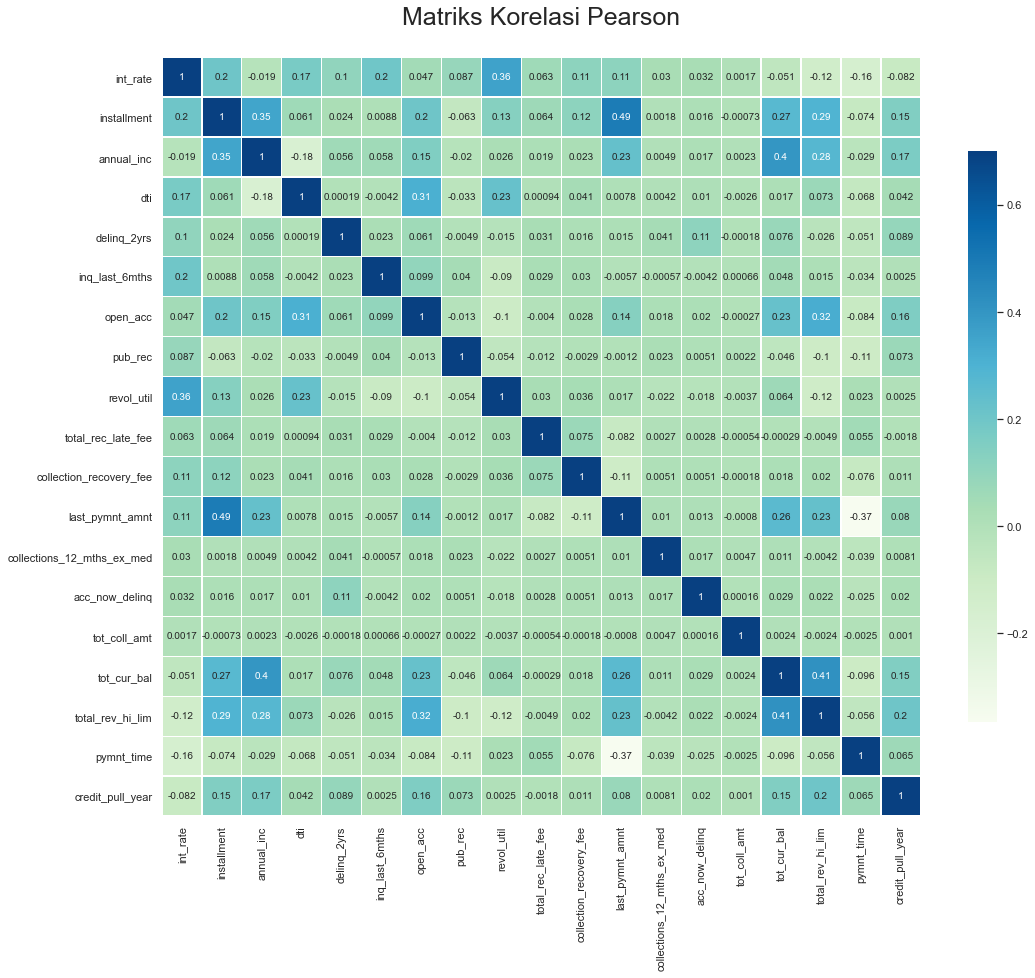

In [198]:
sns.set(style="whitegrid", font_scale=1)
plt.figure(figsize = (17,15))
plt.title("Matriks Korelasi Pearson\n",fontsize=25)
sns.heatmap(num.corr(),linewidths=0.25,vmax=0.7,square=True,cmap="GnBu",linecolor='w',
            annot=True, annot_kws={"size":10}, cbar_kws={"shrink": .7})

ANY          0.000421
NONE         0.020194
OTHER        0.075307
OWN          8.412041
RENT        42.366478
MORTGAGE    49.125560
Name: home_ownership, dtype: float64


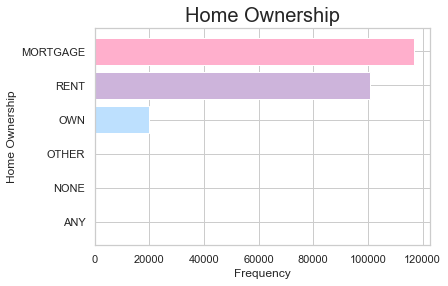

In [199]:
#EDA Home Ownership
fig, ax = plt.subplots()
data2 = df_clean['home_ownership'].value_counts().sort_values()
home_ownership = data2.index
frequency = data2.values
bar_color = ("#BDE0FE","#CDB4DB","#FFAFCC")
ax.barh(home_ownership, frequency, color=bar_color)
ax.set_title('Home Ownership', fontsize=20)
ax.set_ylabel('Home Ownership')
ax.set_xlabel('Frequency')
print(data2/data2.sum()*100)
plt.show()

In [200]:
#mengkategorikan other, any, none ke "other"
home_new = {'MORTGAGE':'MORTGAGE',
               'RENT':'RENT',
               'OWN':'OWN',
               'OTHER':'OTHER',
               'ANY':'OTHER',
               'NONE':'OTHER'}

df_clean["home_ownership"] = df_clean["home_ownership"].map(home_new)
df_clean["home_ownership"].value_counts()

MORTGAGE    116769
RENT        100703
OWN          19995
OTHER          228
Name: home_ownership, dtype: int64

OTHER        0.095921
OWN          8.412041
RENT        42.366478
MORTGAGE    49.125560
Name: home_ownership, dtype: float64


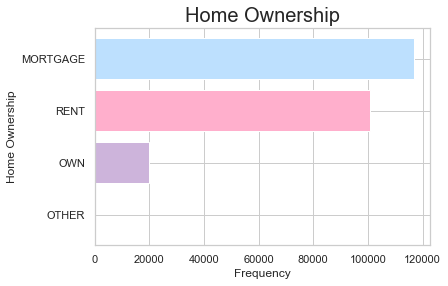

In [201]:
fig, ax = plt.subplots()
data4 = df_clean['home_ownership'].value_counts().sort_values()
home_ownership = data4.index
frequency = data4.values
bar_color = ("#BDE0FE","#CDB4DB","#FFAFCC")
ax.barh(home_ownership, frequency, color=bar_color)
ax.set_title('Home Ownership', fontsize=20)
ax.set_ylabel('Home Ownership')
ax.set_xlabel('Frequency')
print(data4/data4.sum()*100)
plt.show()

renewable_energy       0.107701
educational            0.177538
vacation               0.612550
house                  0.644944
moving                 0.795978
wedding                0.848566
medical                1.138434
car                    1.471634
small_business         2.005091
major_purchase         2.503629
other                  5.736343
home_improvement       5.815856
credit_card           19.950357
debt_consolidation    58.191380
Name: purpose, dtype: float64


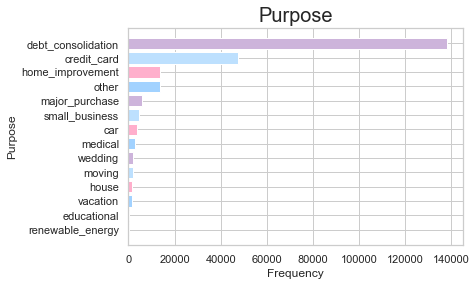

<Figure size 2880x1440 with 0 Axes>

In [202]:
#EDA purpose
fig, ax = plt.subplots()
plt.figure(figsize = (40,20))
data3 = df_clean["purpose"].value_counts().sort_values()
purpose = data3.index
frequency = data3.values
bar_color = ("#BDE0FE","#CDB4DB","#A2D2FF","#FFAFCC")
ax.barh(purpose, frequency, color=bar_color)
ax.set_title('Purpose', fontsize=20)
ax.set_ylabel('Purpose')
ax.set_xlabel('Frequency')
print(data3/data3.sum()*100)

plt.show()

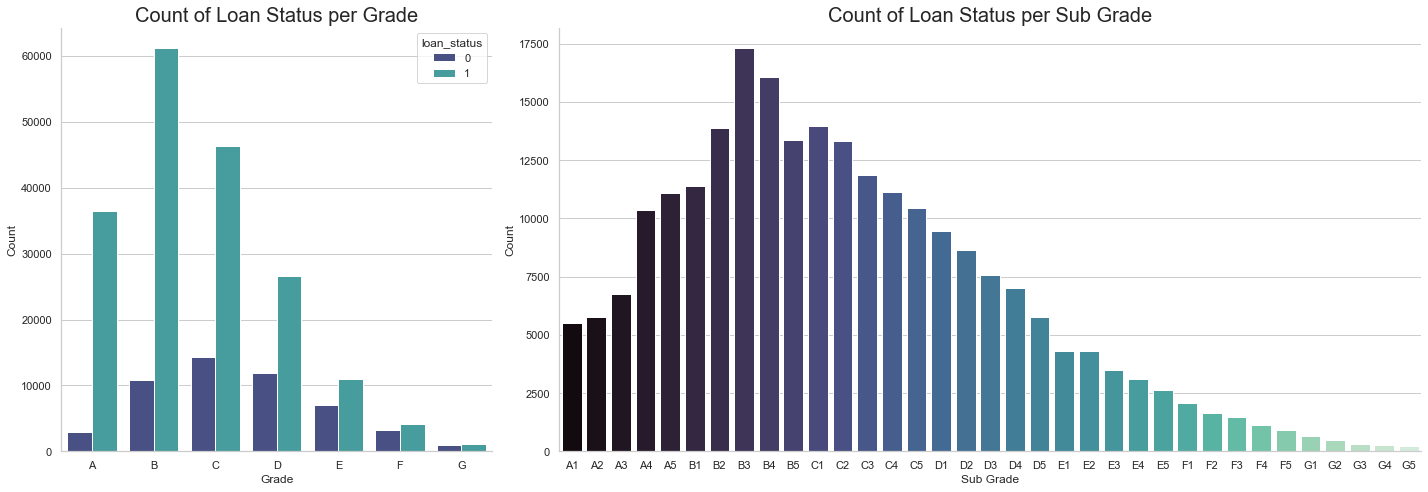

In [203]:
fig, axes = plt.subplots(1, 2, figsize=(20,7), gridspec_kw={'width_ratios': [1, 2]})
sns.countplot(x='grade', hue='loan_status', data=df_clean, order=sorted(df_clean['grade'].unique()), palette='mako', ax=axes[0])
sns.countplot(x='sub_grade', data=df_clean, palette='mako', order=sorted(df_clean['sub_grade'].unique()), ax=axes[1])
sns.despine()
axes[0].set(xlabel='Grade', ylabel='Count')
axes[0].set_title('Count of Loan Status per Grade', size=20)
axes[1].set(xlabel='Sub Grade', ylabel='Count')
axes[1].set_title('Count of Loan Status per Sub Grade', size=20)
plt.tight_layout()

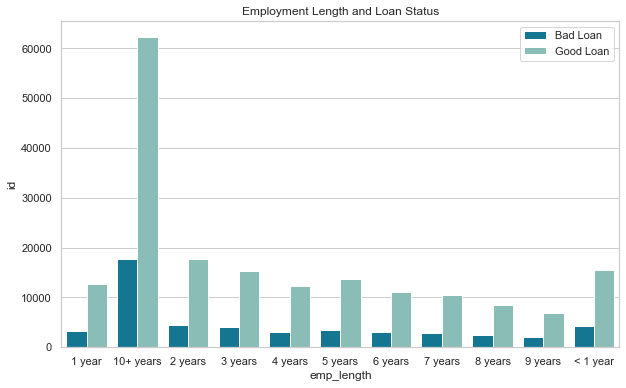

In [204]:
plt.figure(figsize=(10,6))
emplength_loan = df_clean.groupby(['emp_length', 'loan_status'])['id'].count().reset_index()

p = sns.barplot(data=emplength_loan, x='emp_length', y='id', hue='loan_status',palette=['#0081a7','#83c5be'])
plt.title("Employment Length and Loan Status")
legend_labels, _= p.get_legend_handles_labels()
p.legend(legend_labels,['Bad Loan', 'Good Loan'])
plt.show(p)

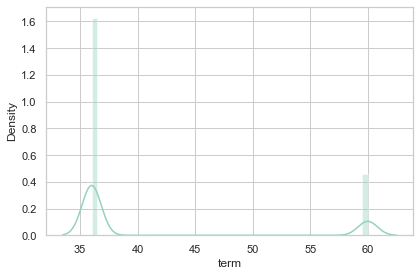

In [205]:
def text_num(text):
  return [int(s) for s in text.split() if s.isdigit()][0]
sns.distplot(df_clean["term"].apply(lambda x: text_num(x)), color="#94d2bd")
plt.tight_layout()
plt.show()
df_clean["term"] = df_clean["term"].apply(lambda x: text_num(x))

In [206]:
df_clean.head()

,id,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_util,initial_list_status,total_rec_late_fee,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,pymnt_time,credit_pull_year
0,1077501,36,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,1,n,credit_card,27.65,0.0,1.0,3.0,0.0,83.7,f,0.00,0.00,171.62,0.0,0.0,0.0,81539.0,22800.0,37,31
1,1077430,60,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,0,n,car,1.00,0.0,5.0,3.0,0.0,9.4,f,0.00,1.11,119.66,0.0,0.0,0.0,81539.0,22800.0,16,14
2,1077175,36,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,1,n,small_business,8.72,0.0,2.0,2.0,0.0,98.5,f,0.00,0.00,649.91,0.0,0.0,0.0,81539.0,22800.0,30,15
3,1076863,36,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,1,n,other,20.00,0.0,1.0,10.0,0.0,21.0,f,16.97,0.00,357.48,0.0,0.0,0.0,81539.0,22800.0,37,19
4,1075269,36,7.90,156.46,A,A4,3 years,RENT,36000.0,Source Verified,1,n,wedding,11.20,0.0,3.0,9.0,0.0,28.3,f,0.00,0.00,161.03,0.0,0.0,0.0,81539.0,22800.0,37,11


<AxesSubplot:>

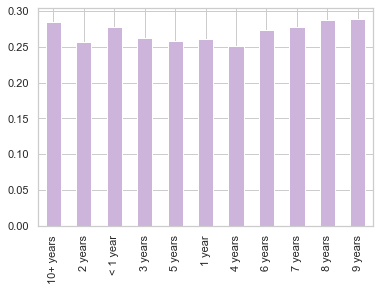

In [207]:
emplength_bad = df_clean[df_clean["loan_status"] == 0]["emp_length"].value_counts() / df_clean[df_clean["loan_status"] == 1]["emp_length"].value_counts()
emplength_bad.plot.bar(color='#cdb4db')

In [208]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237695 entries, 0 to 237694
Data columns (total 30 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id                          237695 non-null  int64  
 1   term                        237695 non-null  int64  
 2   int_rate                    237695 non-null  float64
 3   installment                 237695 non-null  float64
 4   grade                       237695 non-null  object 
 5   sub_grade                   237695 non-null  object 
 6   emp_length                  237695 non-null  object 
 7   home_ownership              237695 non-null  object 
 8   annual_inc                  237695 non-null  float64
 9   verification_status         237695 non-null  object 
 10  loan_status                 237695 non-null  int64  
 11  pymnt_plan                  237695 non-null  object 
 12  purpose                     237695 non-null  object 
 13  dti           

In [209]:
dummies = pd.get_dummies(df_clean[['grade',
                                   'sub_grade',
                                   'emp_length',
                                   'home_ownership',
                                   'verification_status',
                                   'pymnt_plan',
                                   'purpose',
                                   'initial_list_status']],drop_first=True)

In [210]:
dummies.head()

,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,sub_grade_E5,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,emp_length_10+ years,emp_length_2 years,emp_length_3 years,emp_length_4 years,emp_length_5 years,emp_length_6 years,emp_length_7 years,emp_length_8 years,emp_length_9 years,emp_length_< 1 year,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,pymnt_plan_y,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w
0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [211]:
df_new = pd.concat([df_clean,dummies],axis=1)
df_new = df_new.drop(['grade',
                      'sub_grade',
                      'emp_length',
                      'home_ownership',
                      'verification_status',
                      'pymnt_plan',
                      'purpose',
                      'initial_list_status'],axis=1)

In [212]:
df_new.head()

,id,term,int_rate,installment,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_util,total_rec_late_fee,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,pymnt_time,credit_pull_year,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,sub_grade_E5,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,emp_length_10+ years,emp_length_2 years,emp_length_3 years,emp_length_4 years,emp_length_5 years,emp_length_6 years,emp_length_7 years,emp_length_8 years,emp_length_9 years,emp_length_< 1 year,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,pymnt_plan_y,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w
0,1077501,36,10.65,162.87,24000.0,1,27.65,0.0,1.0,3.0,0.0,83.7,0.00,0.00,171.62,0.0,0.0,0.0,81539.0,22800.0,37,31,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1077430,60,15.27,59.83,30000.0,0,1.00,0.0,5.0,3.0,0.0,9.4,0.00,1.11,119.66,0.0,0.0,0.0,81539.0,22800.0,16,14,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1077175,36,15.96,84.33,12252.0,1,8.72,0.0,2.0,2.0,0.0,98.5,0.00,0.00,649.91,0.0,0.0,0.0,81539.0,22800.0,30,15,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,1076863,36,13.49,339.31,49200.0,1,20.00,0.0,1.0,10.0,0.0,21.0,16.97,0.00,357.48,0.0,0.0,0.0,81539.0,22800.0,37,19,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,1075269,36,7.90,156.46,36000.0,1,11.20,0.0,3.0,9.0,0.0,28.3,0.00,0.00,161.03,0.0,0.0,0.0,81539.0,22800.0,37,11,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [213]:
#Features
X = df_new.drop("loan_status", axis=1).values
#Label
y = df_new["loan_status"].values
#Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [214]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(190156, 91)
(47539, 91)
(190156,)
(47539,)


In [215]:
df_new.columns

Index(['id', 'term', 'int_rate', 'installment', 'annual_inc', 'loan_status', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_util', 'total_rec_late_fee', 'collection_recovery_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'pymnt_time', 'credit_pull_year', 'grade_B', 'grade_C', 'grade_D', 'grade_E', 'grade_F', 'grade_G', 'sub_grade_A2', 'sub_grade_A3', 'sub_grade_A4', 'sub_grade_A5', 'sub_grade_B1', 'sub_grade_B2', 'sub_grade_B3', 'sub_grade_B4', 'sub_grade_B5', 'sub_grade_C1', 'sub_grade_C2', 'sub_grade_C3', 'sub_grade_C4', 'sub_grade_C5', 'sub_grade_D1', 'sub_grade_D2', 'sub_grade_D3', 'sub_grade_D4', 'sub_grade_D5', 'sub_grade_E1', 'sub_grade_E2', 'sub_grade_E3', 'sub_grade_E4', 'sub_grade_E5', 'sub_grade_F1', 'sub_grade_F2', 'sub_grade_F3', 'sub_grade_F4', 'sub_grade_F5', 'sub_grade_G1', 'sub_grade_G2', 'sub_grade_G3', 'sub_grade_G4', 'sub_grade_G5', 'emp_length_10+ years',
       'emp

In [216]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [217]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [218]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [227]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 8873  1344]
 [ 1187 36135]]


In [220]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9467595027240792


In [221]:
precision = precision_score(y_test, y_pred)
print(precision)

0.9641399183542784


In [222]:
recall = recall_score(y_test, y_pred)
print(recall)

0.9681957022667596


In [223]:
f1_score = 2*precision*recall/(precision+recall)
print(f1_score)

0.9661635539631824


In [224]:
predictions = classifier.predict_proba(X_test)
predictions

array([[2.62012634e-14, 1.00000000e+00],
       [3.93569721e-05, 9.99960643e-01],
       [5.90084214e-01, 4.09915786e-01],
       ...,
       [9.32153454e-09, 9.99999991e-01],
       [2.75457052e-03, 9.97245429e-01],
       [1.05745341e-04, 9.99894255e-01]])

In [225]:
#model output file
df_prediction_prob = pd.DataFrame(predictions, columns=['prob_0','prob_1'])
df_prediction_target = pd.DataFrame(classifier.predict(X_test), columns=['predicted_TARGET'])
df_test_dataset = pd.DataFrame(y_test, columns = ['Actual Outcome'])

dfx = pd.concat([df_test_dataset, df_prediction_prob, df_prediction_target], axis=1)
dfx.to_csv("C:\SELLY\KULIAH\SEMESTER 5\Rakamin\Data Scientist IDX\c1_Model_Prediction.csv", sep=';', decimal=',', encoding='UTF-8')
dfx.head(10)

,Actual Outcome,prob_0,prob_1,predicted_TARGET
0,1,2.620126e-14,1.000000,1
1,1,3.935697e-05,0.999961,1
2,0,5.900842e-01,0.409916,0
3,1,4.789990e-02,0.952100,1
4,1,4.440892e-16,1.000000,1
5,0,9.363619e-01,0.063638,0
6,1,1.208687e-08,1.000000,1
7,1,2.220446e-16,1.000000,1
8,1,6.556816e-02,0.934432,1
9,1,5.786347e-07,0.999999,1
